1e-07 0.174333333333 0.163
0.0001 0.17445 0.1631
0.1 0.174683333333 0.1633
1 0.174716666667 0.1635
1000 0.176466666667 0.1644
1000000 0.249066666667 0.2426
1000000000 0.26525 0.2616
1000000000000 0.887633333333 0.8865


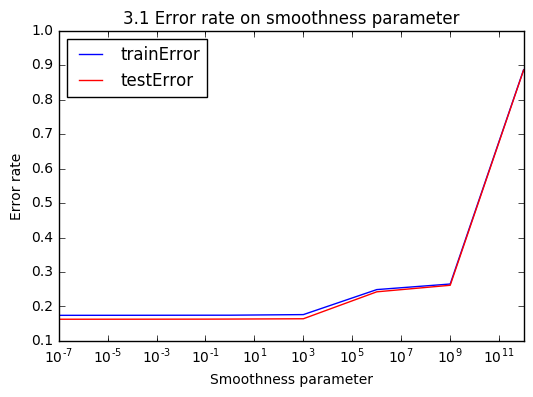

In [16]:
#3.1 Error rate on smoothness parameter
import csv
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.datasets import fetch_mldata

beta = [0.0000001, 0.0001, 0.1, 1, 1000, 1000000, 1000000000, 1000000000000]
## Loading data
mnist = fetch_mldata('MNIST-original')
train, test = mnist.data[0:60000, :], mnist.data[60000:, :]
X_trn, y_trn = mnist.data[0:60000, :], mnist.target[0:60000]
X_tst, y_tst = mnist.data[60000:, :], mnist.target[60000:]

trainError = [];
testError = [];
for i in range(0, 8):
    clf = MultinomialNB(alpha = beta[i], class_prior = None, fit_prior = True)
    clf = clf.fit(X_trn,y_trn)
    tst = clf.predict(X_tst)
    accuracy = clf.score(X_trn, y_trn)
    testAccuracy = accuracy_score(y_tst, tst)
    trainError.append(1 - accuracy)
    testError.append(1 - testAccuracy)
    print(beta[i], 1 - accuracy, 1 - testAccuracy)

# Plotting error rate as a function of smoothness parameter

plt.figure()
plt.plot(beta, trainError, c='blue', label='trainError')
plt.plot(beta, testError, c='red', label='testError')
plt.xscale('log')
plt.legend(loc = 0)
plt.ylim(0.1, 1)
plt.ylabel('Error rate')
plt.xlabel('Smoothness parameter')
plt.title('3.1 Error rate on smoothness parameter')

plt.show()
